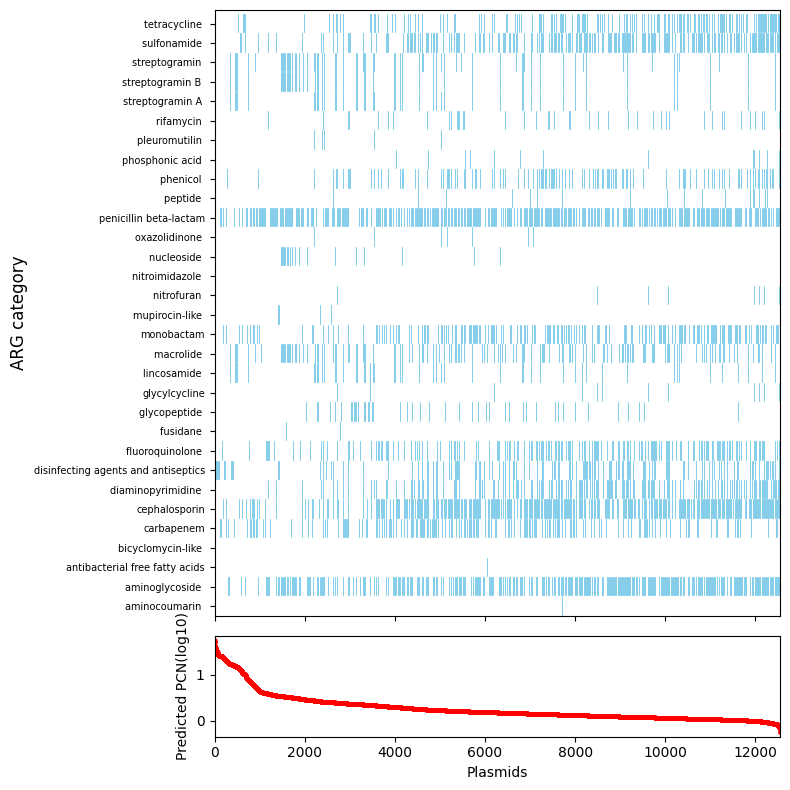

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load and sort data
plasmidARG = pd.read_excel('Fig4_data.xlsx', sheet_name='Sheet1')
plasmidARG = plasmidARG.sort_values(
    by="Original_PCN ",
    ascending=False,
    ignore_index=True
)

# Extract the original PCN values for the trend line
pcn_values = plasmidARG["Original_PCN "].values

# Apply log10 transformation to the PCN values (WARNING: If PCN contains zeros, this will result in an error)
pcn_values_log10 = np.log10(pcn_values)

# Trim to just columns 1-32 (drop index column and everything after ARG matrix)
plasmidARG = plasmidARG.iloc[:, 1:33]

# Prepare heatmap data
ID_col = 'SeqID'
heatmap_data = plasmidARG.drop(columns=[ID_col])
seq_ids = plasmidARG[ID_col]

# Create figure with two subplots (heatmap on top, PCN trend at bottom)
fig, (ax1, ax2) = plt.subplots(
    2, 1, 
    figsize=(8, 8), 
    gridspec_kw={'height_ratios': [6, 1]},
    sharex=True
)

# 1. Draw heatmap on top subplot using original PCN values
for i in range(heatmap_data.shape[1]):
    for j in range(heatmap_data.shape[0]):
        if heatmap_data.iat[j, i] > 0:
            ax1.bar(j, 1,
                   bottom=i,
                   width=1.0,
                   color='skyblue',
                   align='center')

# Draw horizontal grid lines
for i in range(1, heatmap_data.shape[1]):
    ax1.axhline(i, color='white', linewidth=0.2)

# Label y-axis with ARG categories (remove 'antibiotic' from the category names)
cleaned_labels = [label.replace("antibiotic", "") for label in heatmap_data.columns]
ax1.set_yticks(np.arange(heatmap_data.shape[1]) + 0.5)
ax1.set_yticklabels(cleaned_labels, fontsize=7)
ax1.set_xlim(-0.5, heatmap_data.shape[0] - 0.5)
ax1.set_ylim(0, heatmap_data.shape[1] + 0.2)
ax1.set_ylabel("ARG category", fontsize=12)

# 2. Draw log10 PCN trend line on bottom subplot
ax2.plot(np.arange(len(pcn_values_log10)), pcn_values_log10, 
        color='red', 
        linewidth=1,
        marker='o',
        markersize=2)

# Customize trend plot
ax2.set_ylabel("Predicted PCN(log10)", fontsize=10)
ax2.set_xlabel("Plasmids", fontsize=10)

# Adjust layout and save
plt.tight_layout()
plt.savefig('Figure_4C.pdf', format='pdf', dpi=1200)
plt.show()
